In [78]:
from databroker import Broker
import pandas as pds
db = Broker.named('smi')

In [124]:
%matplotlib notebook
from pySMI.smi_libs import *

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
import pickle as cpk
from os import listdir
from os.path import isfile, join

import numpy as np
import sys, os, PIL
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter as sf
from pySMI.smi_generic_functions import plot1D, show_img, create_ring_mask
from pySMI.DataGonio import CalibrationGonio, Mask

from pySMI.Stitching import (get_base_all_filenames, get_phi, 
                             get_qmap_range,Correct_Overlap_Images_Intensities,check_overlap_scaling_factor,
                             stitch_WAXS_in_Qspace,
                            )


from os import listdir
from os.path import isfile, join
tifs = np.array( [f for f in listdir(inDir) if isfile(join(inDir, f))] )
#tifsc = list(tifs.copy())    
utifs = np.sort( tifs )

def save_to_tiff( fp, ResDir ):
    d = np.array(  PIL.Image.open( fp    ).convert('I') )
    img = PIL.Image.fromarray(d)
    outp = ResDir + inf.split('/')[-1][:-4] + '_s.tif'
    img.save(  outp )   
    print( 'The data: %s is save to: %s.'%(fp, outp ))
    

def load_data(fp, inDir):
    return np.array(  PIL.Image.open( inDir + fp    ).convert('I') )


import matplotlib.ticker as mtick

def plot_table(table, x='dsa_x', y=['pil1M_stats1_total'], separate=False,
               logy=True, grid=True, **kwargs):

    # plt.clf()
    # plt.cla()

    fig = plt.figure(figsize=(8, 5.5))
    if not separate:
        ax = fig.add_subplot(111)     
    x_data = table[x]
    i=0
    
    
    for y_ in y:
        y_data = table[y_]        
        if separate:
            N=len(y)
            sx = int( np.ceil(np.sqrt(N)) )
            sy = int( np.ceil(N/sx) )
            
            ax=fig.add_subplot(sx,sy,i+1)
        ax.plot(x_data, y_data, label= y_, **kwargs)
        i += 1  
        ax.legend()
        if grid:
            ax.grid()
    
    ax.set_xlabel(x)
    #ax.set_ylabel(y)
    
    if logy:
        ax.set_yscale('log')    
    # ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    fig.tight_layout()
    return fig
        

def plot_1d(scans, x='dsa_x', y='pil1M_stats1_total', logy=False, grid=True, **kwargs):

    # plt.clf()
    # plt.cla()

    fig = plt.figure(figsize=(8, 5.5))
    ax = fig.add_subplot(111)

    for s in scans:
        h = db[s]
        x_data = h.table()[x]
        y_data = h.table()[y]
        ax.plot(x_data, y_data, label=f"scan_id={h.start['scan_id']}", **kwargs)

    ax.legend()
    if logy:
        ax.set_yscale('log')
        
    if grid:
        ax.grid()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    # ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

        
        


# Define input and output filepath here

In [82]:
inDir = '/home/yuzhang/analysis/temp/' #only if databroker is not working

outDir = '/GPFS/xf12id1/analysis/users/DeLongchamp/Results/'

In [54]:
#img = load_data(utifs[0], inDir )

# Give a UID here

In [90]:
uid = '301c15' #uid for a scan



# Get table from the given UID

In [91]:

h=db[uid]
t = h.table() #

# Save tabel to a csv file

In [92]:
output_filename = 'PBTTT_250_80eV'

In [93]:
t.to_csv(outDir + output_filename + '.csv')

In [94]:
t.columns

Index(['time', 'pil1mstats2', 'vdm_th', 'vdm_th_user_setpoint', 'ssacurrent',
       'energy_energy_setpoint', 'energy_energy', 'energy_ivugap_readback',
       'energy_bragg', 'pil1M_stats1_total', 'pil1M_image',
       'pil300KW_stats1_total', 'pil300KW_image', 'pil1mstats3'],
      dtype='object')

# Plot the table and save

In [125]:
plot_yname = ['pil1mstats2', 'ssacurrent', 'pil1M_stats1_total',
         'pil300KW_stats1_total',    'pil1mstats3']

<IPython.core.display.Javascript object>


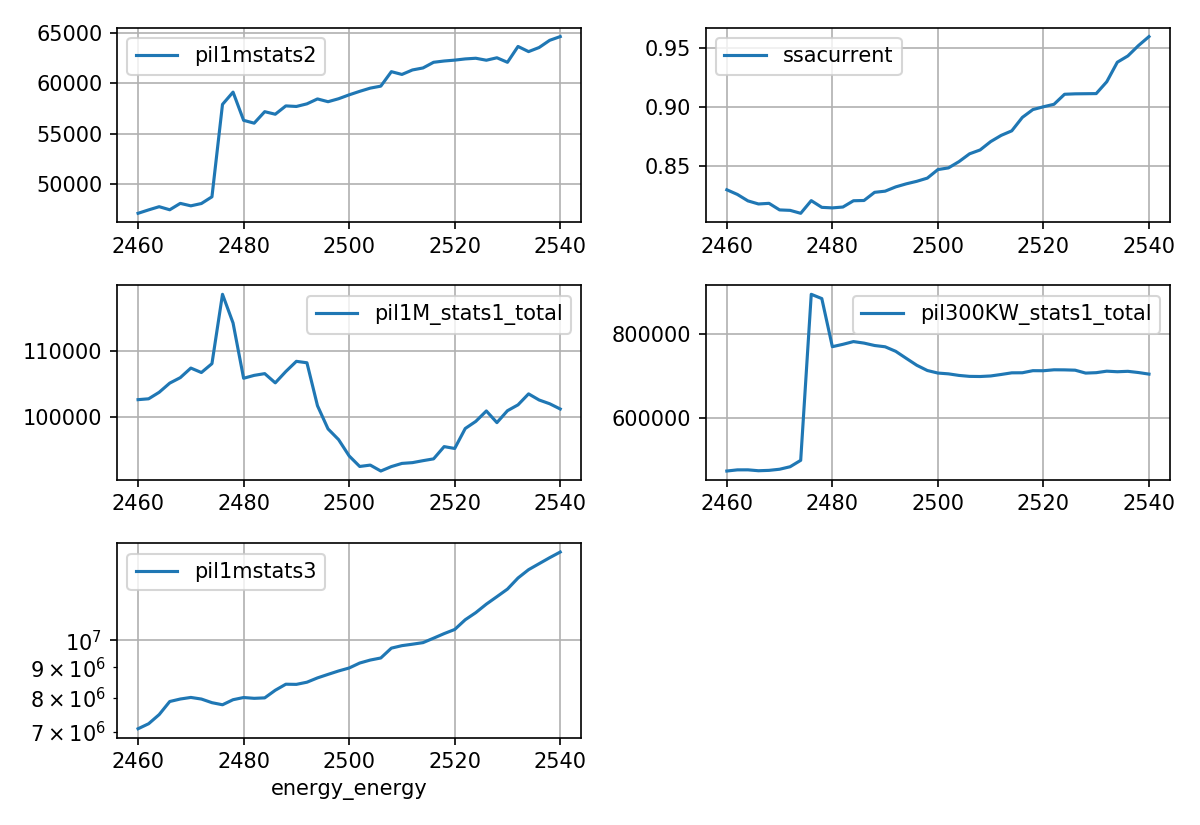

In [126]:
fig = plot_table(t, x= 'energy_energy', y = plot_yname, separate=True)
fig.savefig( outDir + output_filename +  '.png' )

<IPython.core.display.Javascript object>


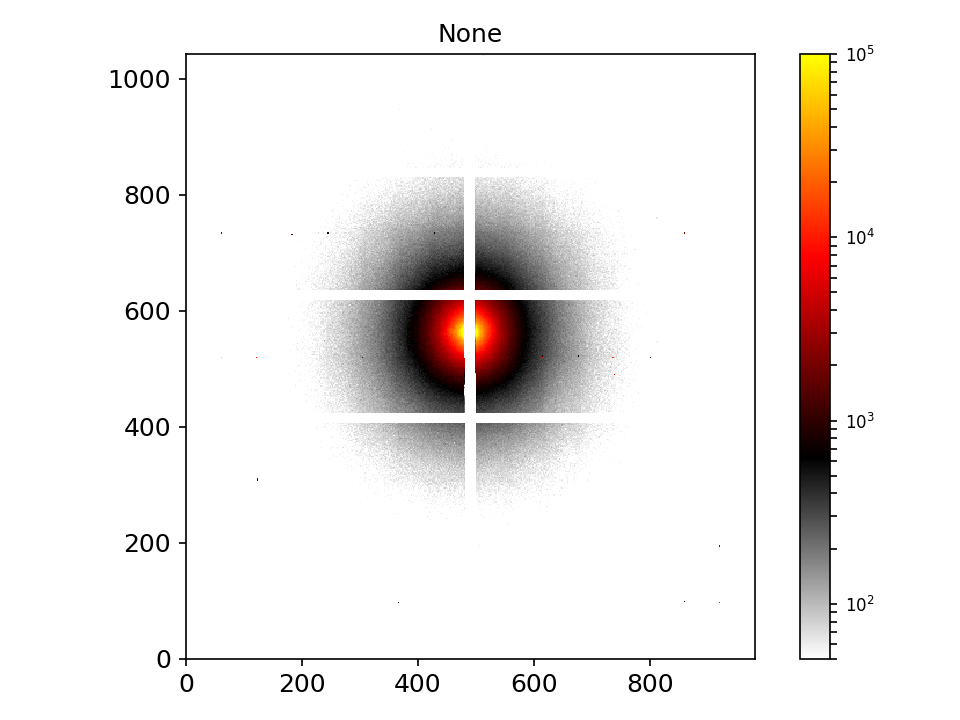

/opt/conda_envs/analysis/lib/python3.6/site-packages/matplotlib/colorbar.py:821: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  y[self._inside] = norm(yi)


In [30]:
show_img(img,cmap = cmap_albula, logs=True, vmin= 5e1, vmax= 1e5,    aspect=1, )